# Figure 3

This notebook must be run within the `benchmark_env` environment.

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df<-readr::read_tsv("outputs/gsai_vs_llm2geneset_outputs.tsv")
colnames(df)

Rows: 4806 Columns: 11
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): model, library, gt_name, gt_name_clean, name, method
dbl (5): ROUGE1, ROUGE2, csim, in_toks, out_toks

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "model"         "library"       "gt_name"       "gt_name_clean"
 [5] "name"          "ROUGE1"        "ROUGE2"        "csim"         
 [9] "method"        "in_toks"       "out_toks"

In [3]:
colnames(df)

[1] "model"         "library"       "gt_name"       "gt_name_clean"
 [5] "name"          "ROUGE1"        "ROUGE2"        "csim"         
 [9] "method"        "in_toks"       "out_toks"

In [9]:
# Group by 'model' and 'method', and calculate the mean of 'ROUGE1', 'ROUGE2', and 'csim'
df_summary <- df %>%
  group_by(model, method, library) %>%
  summarize(
    mean_ROUGE1 = mean(ROUGE1, na.rm = TRUE),  # Compute mean of ROUGE1
    mean_ROUGE2 = mean(ROUGE2, na.rm = TRUE),  # Compute mean of ROUGE2
    mean_csim = mean(csim, na.rm = TRUE),       # Compute mean of csim
    in_toks = sum(in_toks),
    out_toks = sum(out_toks)
  ) %>%
  ungroup()  # Ungroup the data

# View the summarized data frame
df_summary
df_summary$out_toks

`summarise()` has grouped output by 'model', 'method'. You can override using the `.groups` argument.


model,method,library,mean_ROUGE1,mean_ROUGE2,mean_csim,in_toks,out_toks
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gpt-3.5-turbo-0125,GSAI,WikiPathway_2023_Human,0.2427259,0.09314507,0.4939454,923864,193665
gpt-3.5-turbo-0125,llm2geneset,WikiPathway_2023_Human,0.2669994,0.13107578,0.5332824,935913,909211
gpt-4o-2024-08-06,GSAI,WikiPathway_2023_Human,0.2735305,0.10560861,0.5079991,932769,330696
gpt-4o-2024-08-06,llm2geneset,WikiPathway_2023_Human,0.2992668,0.13951144,0.5592225,934695,1318587
gpt-4o-mini-2024-07-18,GSAI,WikiPathway_2023_Human,0.2352489,0.07300362,0.4797363,919308,390518
gpt-4o-mini-2024-07-18,llm2geneset,WikiPathway_2023_Human,0.2754580,0.12933049,0.5375691,932522,1212903


In [10]:
df_long <- df_summary %>%
  pivot_longer(cols = c(mean_ROUGE1, mean_ROUGE2, mean_csim),  # Columns to pivot
               names_to = "metric",  # New column for the metric names (ROUGE1, ROUGE2, csim)
               values_to = "mean_value")  # New column for the mean values

# View the transformed data frame
df_long

model,method,library,in_toks,out_toks,metric,mean_value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
gpt-3.5-turbo-0125,GSAI,WikiPathway_2023_Human,923864,193665,mean_ROUGE1,0.24272595
gpt-3.5-turbo-0125,GSAI,WikiPathway_2023_Human,923864,193665,mean_ROUGE2,0.09314507
gpt-3.5-turbo-0125,GSAI,WikiPathway_2023_Human,923864,193665,mean_csim,0.49394540
gpt-3.5-turbo-0125,llm2geneset,WikiPathway_2023_Human,935913,909211,mean_ROUGE1,0.26699940
gpt-3.5-turbo-0125,llm2geneset,WikiPathway_2023_Human,935913,909211,mean_ROUGE2,0.13107578
gpt-3.5-turbo-0125,llm2geneset,WikiPathway_2023_Human,935913,909211,mean_csim,0.53328242
gpt-4o-2024-08-06,GSAI,WikiPathway_2023_Human,932769,330696,mean_ROUGE1,0.27353054
gpt-4o-2024-08-06,GSAI,WikiPathway_2023_Human,932769,330696,mean_ROUGE2,0.10560861
gpt-4o-2024-08-06,GSAI,WikiPathway_2023_Human,932769,330696,mean_csim,0.50799911


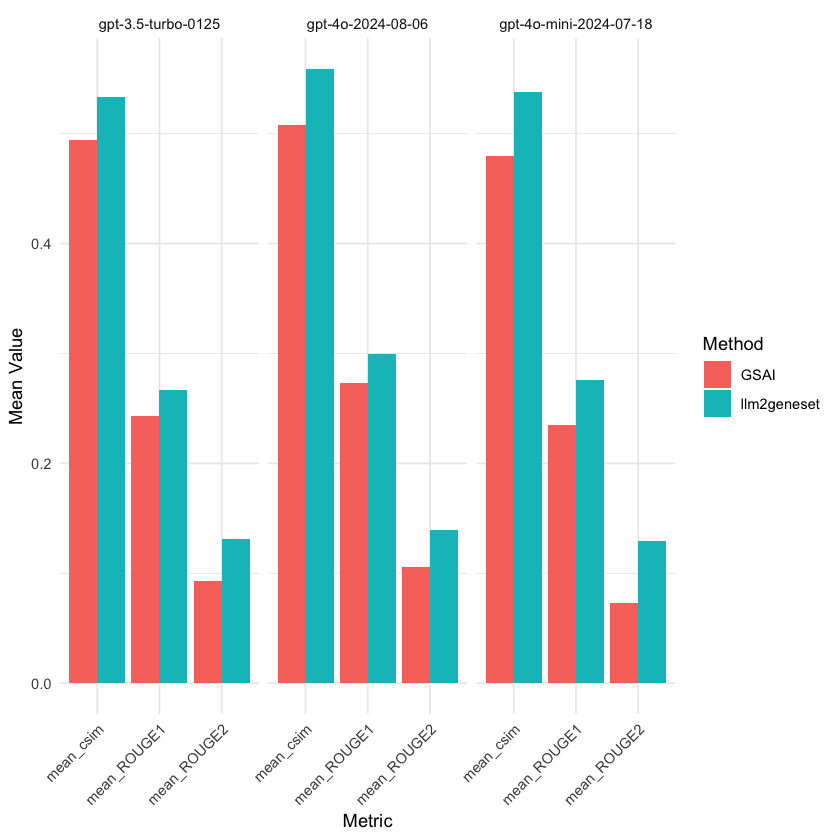

In [15]:


# Create a bar plot of 'mean_value', grouped by 'metric' and filled by 'method', faceted by 'model'
ggplot(df_long, aes(x = metric, y = mean_value, fill = method)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create a grouped bar plot with side-by-side bars
  facet_wrap(~ model) +  # Facet the plot by 'model'
  labs(x = "Metric", y = "Mean Value", fill = "Method") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability